# MECH 309: Assignment 1, Question 3

_Cagri Arslan_

January 7, 2025

In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore') # Hide NaN warning on part (f)

plt.style.use("bmh") # plotting style

### a)
We are given the function:  

\begin{equation}
f(x) = \frac{e^x-e^{-x}}{x}
\tag{1}
\end{equation}

We are to evaluate the limit:  

\begin{equation}
\lim_{x\to 0} f(x) = \lim_{x\to 0} \frac{e^x-e^{-x}}{x}
\tag{2}
\end{equation}

Direct substitution yields an indeterminate form of type $\frac{0}{0}$, so we apply l'Hopital's rule:

\begin{equation}
\lim_{x\to 0} \frac{e^x-e^{-x}}{x} = \lim_{x\to 0} \frac{\frac{d}{dx}(e^x-e^{-x})}{\frac{d}{dx}x} = \lim_{x\to 0} \frac{e^x+e^{-x}}{1}=2
\tag{3}
\end{equation}

Thus, $\boxed{\lim_{x\to 0} \frac{e^x-e^{-x}}{x} = 2}$



### b)

Starting with the known Maclaurin series:

\begin{equation}
e^{x} = \sum_{n=0}^{\infty} \frac{x^n}{n!} \quad \quad e^{-x} = \sum_{n=0}^{\infty} \frac{(-x)^n}{n!}
\tag{4}
\end{equation}

We subtract:

\begin{equation}
e^{x}-e^{-x} = \sum_{n=0}^{\infty} \frac{x^n-(-x)^{n}}{n!}
\tag{5}
\end{equation}

For even $n$, this is equal to $0$. So we only conisder odd terms: $n = 2k+1$. For which: $\,x^{2k+1}-(-x)^{2k+1} = 2x^{2k+1}$. And so:

\begin{equation}
e^{x}-e^{-x} = 2\sum_{k=0}^{\infty} \frac{x^{2k+1}}{(2k+1)!}
\tag{6}
\end{equation}

Dividing by x:

\begin{equation}
\boxed{\frac{e^x-e^{-x}}{x}
= 2\sum_{k=0}^{\infty} \frac{x^{2k}}{(2k+1)!}
= 2\left(1+\frac{x^2}{3!}+\frac{x^4}{5!}+\frac{x^6}{7!}+\cdots\right)}
\tag{7}
\end{equation}

Taking a third-order approximation: 

\begin{equation}
\frac{e^x-e^{-x}}{x} \approx 2\left(1+\frac{x^2}{3!}+\frac{x^4}{5!}+\frac{x^6}{7!}\right)=2+\frac{x^2}{3}+\frac{x^4}{60}+\frac{x^6}{2520}
\tag{8}
\end{equation}

And so:

\begin{equation}
\boxed{{\hat{f}(x)} = 2+\frac{x^2}{3}+\frac{x^4}{60}+\frac{x^6}{2520}}
\tag{9}
\end{equation}

### c)

To obtain $\lim_{x\to 0} {\hat{f}(x)}$, we use direct substitution:

\begin{equation}
\lim_{x\to 0} {\hat{f}(x)} = \lim_{x\to 0} 2+\frac{x^2}{3}+\frac{x^4}{60}+\frac{x^6}{2520} = 2+\frac{0^2}{3}+\frac{0^4}{60}+\frac{0^6}{2520}=2
\tag{10}
\end{equation}

Indeed, $\boxed{\lim_{x\to 0} {\hat{f}(x)} = 2}$

Yes, we do want $\lim_{x\to 0} {\hat{f}(x)} = \lim_{x\to 0} f(x)$ so that the approximation ${\hat{f}(x)}$ preserves the correct near-zero behavior of the original function $f(x)$. In simple terms, as ${\hat{f}(x)}$ approximates $f(x)$ *near $x=0$* (ie. for $x \in [-0.1, 0.1]$), it should approach the same value of $f(x)$ as $x \to 0$, despite $f(x)$ being indeterminate at $x=0$ exactly. We do not require ${\hat{f}(x)} =f(x)$ on the entire interval (or even at any point on the interval); we only need ${\hat{f}(x)}$ to be close on the the interval $x \in [-0.1, 0.1]$. This is desirable because the series form avoids subtracting two nearly equal exponentials and then dividing by a very small $x$, which can amplify floating-point error and make the direct formula unstable near zero. 

### d)

The provided code snippet, with `func_hat(x)` filled in, and a function to compute relative error added, is below. The following values have been computed:  

$f(x) \approx 2.003$  
$f(\hat{x}) = 2.008$

$\mathrm{RE}_{f(\hat{x})} \approx 0.2235\, \%$

It should be noted that this is a sort of *input error*. An error has been induced in the input value $x$ (turning it into $\hat{x}$), while the function $f(x)$ remains the true function. 

In [2]:
# Functions

def relative_error(Atrue, Ameasured):
    """
    Evaluates the relative error as a percentage between the true value and measured or 
    approximated valye of a quantity A

    Inputs:
        Atrue (float or np.array): The true value of a quantity A
        Ameasured (float or np.array): The measured/approximated value of quantity A

    Returns:
        re (float): The relative error between Atrue and Ameasured 
    """
    return abs(Atrue-Ameasured)/abs(Atrue) * 100

def func(x):
    # The true function
    return (np.exp(x) - np.exp(-x)) / x

def func_hat(x):
    # The approximate function
    return 2 + x ** 2 / 3 + x ** 4 / 60 + x ** 6 / 2520

# Function evaluation 
x = 0.1 # default is np.float64
x16 = np.float16(x) # 16 bit float representation of x

f_true = func(x) # f(x)
print('f_{true}(x) =', f_true, '\n')

f1_16 = func(x16) # f(x_hat)
print('f(x16) = ', f1_16, '\n')

# Compute relative error between f_true and f1_16
re1 = relative_error(f_true, f1_16)
print(f"Relative Error between f(x) and f(x_hat) ={re1: .4f} %")

f_{true}(x) = 2.003335000396882 

f(x16) =  2.008 

Relative Error between f(x) and f(x_hat) = 0.2235 %


### e)

We now compute ${\hat{f}(\hat x)}$; that is, inputting the less accurate (16-bit float) $\hat x$ into the finite polynomial approximtion of $f(x)$: ${f}(\hat x)$. Aterwards, we evaluate the relative error as a percentage between $f(x)$ and ${\hat{f}(\hat x)}$. The results are as follows:

${\hat{f}(\hat x)}$ = 2.004  

$\mathrm{RE}_{\hat{f}(\hat x)} \approx 0.0285\,\%$

It should be noted that $\boxed{\mathrm{RE}_{\hat{f}(\hat x)} \text{ is significantly lower than } \mathrm{RE}_{f(\hat{x})}}$. That is: ${\hat{f}(\hat x)}$ has a lower relative error than ${f}(\hat x)$. This might appear counterintuitive at first, however this is an expected result, whose reason will be discussed in detail in part (g).

In [3]:
# Compute f_hat(x_hat)
f_hat_16 = func_hat(x16) 

print('f_{hat}(x16) = ', f_hat_16, '\n')

re2 = relative_error(f_true, f_hat_16)

print(f"Relative Error between f(x) and f_hat(x_hat) ={re2: .4f} %")

f_{hat}(x16) =  2.004 

Relative Error between f(x) and f_hat(x_hat) = 0.0285 %


### f)

The three plots below (and the code to construct them) display the following:  

i) $\mathrm{RE}_{f(\hat{x})}$ versus $\hat x$  
ii) $\mathrm{RE}_{\hat{f}(\hat x)}$ versus $\hat x$  
ii) both $\mathrm{RE}_{f(\hat{x})}$ and $\mathrm{RE}_{\hat{f}(\hat x)}$ versus $\hat x$  

Commentary follows. 

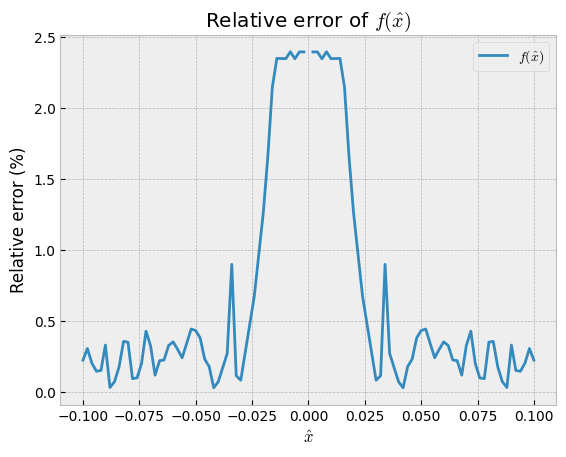

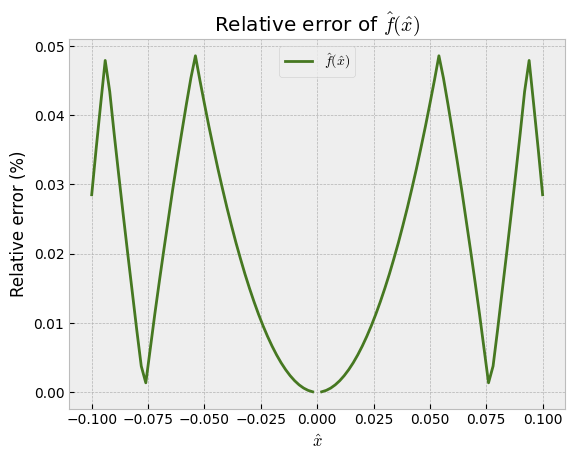

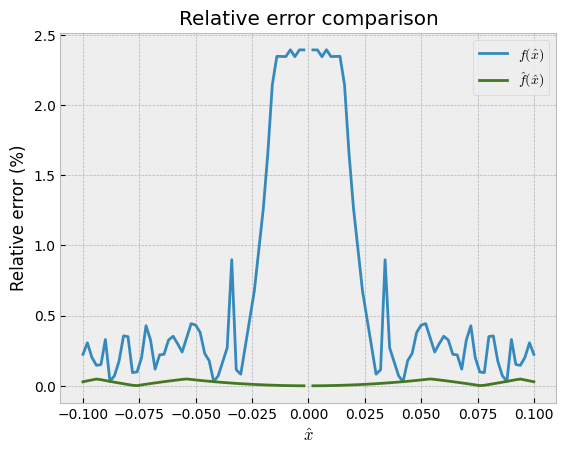

In [4]:
x = np.linspace(-0.1, 0.1, 100 + 1)     # True values of x (float64)
x16 = np.float16(x)                     # Approximate values of x (float16)

f_x = func(x)
f_xhat = func(x16)
fhat_xhat = func_hat(x16)

err_f = relative_error(f_x, f_xhat)
err_fhat = relative_error(f_x, fhat_xhat)

# --- (i) error for f(xhat) ---
plt.figure()
plt.plot(x16, err_f, color="C0", label=r"$f(\hat{x})$")
plt.xlabel(r"$\hat{x}$")
plt.ylabel("Relative error (%)")
plt.title(r"Relative error of $f(\hat{x})$")
plt.grid(True)
plt.legend()
plt.show()

# --- (ii) error for fhat(xhat) ---
plt.figure()
plt.plot(x16, err_fhat, color="C3", label=r"$\hat{f}(\hat{x})$")
plt.xlabel(r"$\hat{x}$")
plt.ylabel("Relative error (%)")
plt.title(r"Relative error of $\hat{f}(\hat{x})$")
plt.grid(True)
plt.legend()
plt.show()

# --- (iii) both on one plot ---
plt.figure()
plt.plot(x16, err_f, color="C0", label=r"$f(\hat{x})$")
plt.plot(x16, err_fhat, color="C3", label=r"$\hat{f}(\hat{x})$")
plt.xlabel(r"$\hat{x}$")
plt.ylabel("Relative error (%)")
plt.title("Relative error comparison")
plt.grid(True)
plt.legend()
plt.show()


The plots above indicate that ${\hat{f}(\hat x)}$ has a smaller relative error that $f(\hat{x})$ throughout the entire domain of $x \in [-0.1, 0.1]$. Particularly, the relative error of $f(\hat{x})$ spikes significantly as $\hat x$ approaches $0$, up to almost $2.5 \%$. Contrarily, while the relative error of ${\hat{f}(\hat x)}$ is nonzero, it is far lower than that of $f(\hat{x})$, with no dramatic spikes near $\hat x = 0$.

The reason for the high relative error of $f(\hat{x})$ near $x=0$ is due to the fact that $f(x)$ involves subtracting two nearly-identical numbers (near $x=0$), before dividing by a very small number ($x \to 0$). Intuitively, the poor precision of a float16 subtraction introduces errors, which are then amplified due to the subsequent division, causing significant error (absolute or relative) near $\hat x = 0$. We can formalize this as such:  

The computed quantity in (1): $f(x)$ involves the difference of two terms that are very close to one another when $|\hat x|$ is small. In finite-precision arithmetic, the values $\exp(\hat x)$ and $\exp(\hat{-x})$ each carry a small relative rounding error like:  

\begin{equation}
\widehat{e^{\hat{x}}}=e^{\hat{x}}(1+\delta_1), \qquad \widehat{e^{-\hat{x}}}=e^{-\hat{x}}(1+\delta_2),
\tag{11}
\end{equation}

where $|\delta_1|$ and $|\delta_2|$ are on the order of machine precision (which are far larger for float16 than float64).

Then the computed numerator satisfies

\begin{equation}
\widehat{e^{\hat{x}}}-\widehat{e^{-\hat{x}}}
=(e^{\hat{x}}-e^{-\hat{x}})+\big(e^{\hat{x}}\delta_1-e^{-\hat{x}}\delta_2\big).
\tag{12}
\end{equation}

For small $\hat{x}$, the true difference satisfies $e^{\hat{x}}-e^{-\hat{x}}\approx 2\hat{x}$, while the perturbation term $\big(e^{\hat{x}}\delta_1-e^{-\hat{x}}\delta_2\big)$ remains on the order of $\varepsilon$ since $e^{\pm \hat{x}}\approx 1$. Therefore, the relative error in the numerator scales like

\begin{equation}
\frac{\text{numerical perturbation}}{\text{true numerator}}
\sim \frac{O(\varepsilon)}{O(|\hat{x}|)}
=O\!\left(\frac{\varepsilon}{|\hat{x}|}\right).
\tag{13}
\end{equation}

Thus, for small $\hat x$, the error of $f(\hat{x})$ increases greatly.  

This does **not** occur for ${\hat{f}(\hat x)}$ since the polynomial approximation that ${\hat{f}(\hat x)}$ is equal to in (9) avoids issues stemming from subtracting two very similar numbers or dividing by a shrinking variable. There is no subtraction involved, and all powers of $x$ are divided by invariant constants ($3, 60, 2520$). Thus, the only error introduced on ${\hat{f}(\hat x)}$ are less catastrophic quantization errors, governed by the truncation of the series (which is very small on $[-0.1, 0.1]$) and ordinary float16 rounding during addition/multiplication, which stays on the order of machine precision. Consequently, its relative error stays small across the interval.   

### g)

Technical details shown in (f) clearly indicate that ${\hat{f}(\hat x)}$ is a better choice than $f(\hat x)$ when computing $f(x)$ near $x=0$. Directly attempting to evauate $f(x)$ introduces large errors when computations are done in low precision, due to the sensitive subtraction and division involved. The series-based approximation ${\hat{f}(x)}$ avoids that issue because it replaces the expression with a simple polynomial in $x$, which stays well-behaved and accurate when $x$ is near zero.  

Beyond numerical reasons, a polynomial approximation of a transcendental function (like $\exp(x)$) is typically preferable. Polynomials are infinitely differentiable, so they lack discontinuities (such as at $x=0$, for $f(x)$) that can cause programs and solvers to error. Their consistent outputs in low-precision make them desirable choices for mixed-precision work (ie. involving GPU acceleration). 